# Carbon taxes

A carbon tax is a tax levied on the carbon emissions required to produce goods and services. In this way, they are designed to reduce carbon dioxide emissions by increasing prices. This both decreases demand for such goods and services and incentivizes efforts to make them less carbon-intensive. In its simplest form, a carbon tax covers only CO<sub>2</sub> emissions; however, it can also cover other greenhouse gasses, such as methane or nitrous oxide, by calculating their global warming potential relative to CO<sub>2</sub> emissions. PolicyEngine’s carbon tax model is consumption-based - that is, the tax is levied on the UK’s consumption of CO2-intensive goods, rather than the UK’s production of CO2. Table 1 shows the incidence of this carbon tax model:

Table 1


<table>
  <tr>
   <td>
   </td>
   <td>UK
   </td>
   <td>Non-UK
   </td>
  </tr>
  <tr>
   <td>Owners of production
   </td>
   <td><strong>Reality</strong>: directly taxed by a carbon emissions tax, not indirectly taxed.
<p>
<strong>Model</strong>: Each owner pays <em>s</em>% of x total UK ownership share, in aggregate passes on (1-<em>s</em>)% to consumers.
   </td>
   <td><strong>Reality</strong>: indirectly taxed by a border adjustment, not directly taxed.
<p>
<strong>Model</strong>: assumed non-existent.
   </td>
  </tr>
  <tr>
   <td>Consumers
   </td>
   <td><strong>Reality</strong>: <strong>indirectly</strong> taxed by the carbon emissions tax and <strong>directly</strong> taxed by the border adjustment, depending on sectoral demand elasticities.
<p>
<strong>Model</strong>: Each consumer pays (1 - <em>s</em>)% * total UK consumption share of each consumption sector.
   </td>
   <td><strong>Reality</strong>: not directly or indirectly taxed.
<p>
<strong>Model</strong>: not directly or indirectly taxed.
   </td>
  </tr>
</table>


## Methodology summary

We model carbon taxes by simulating household net incomes through the microsimulation model. The first step: collecting the Family Resources Survey inputs: data on earnings, benefit receipt and demographics for 20,000 households. Then, we load the Living Costs and Food Survey, which has less granular data on earnings, and benefit receipt, but detailed capture of goods and services produced: we impute these consumption variables to the FRS. We then use the National Carbon Footprint dataset to calculate the intensities of certain categories (e.g. the carbon emissions associated with a pound spent on clothing), and use this to estimate the carbon footprint of each FRS household. After we integrate these carbon footprints to the FRS, we run a full microsimulation to simulate disposable incomes with and without a carbon tax.


### Appendix: Carbon intensities

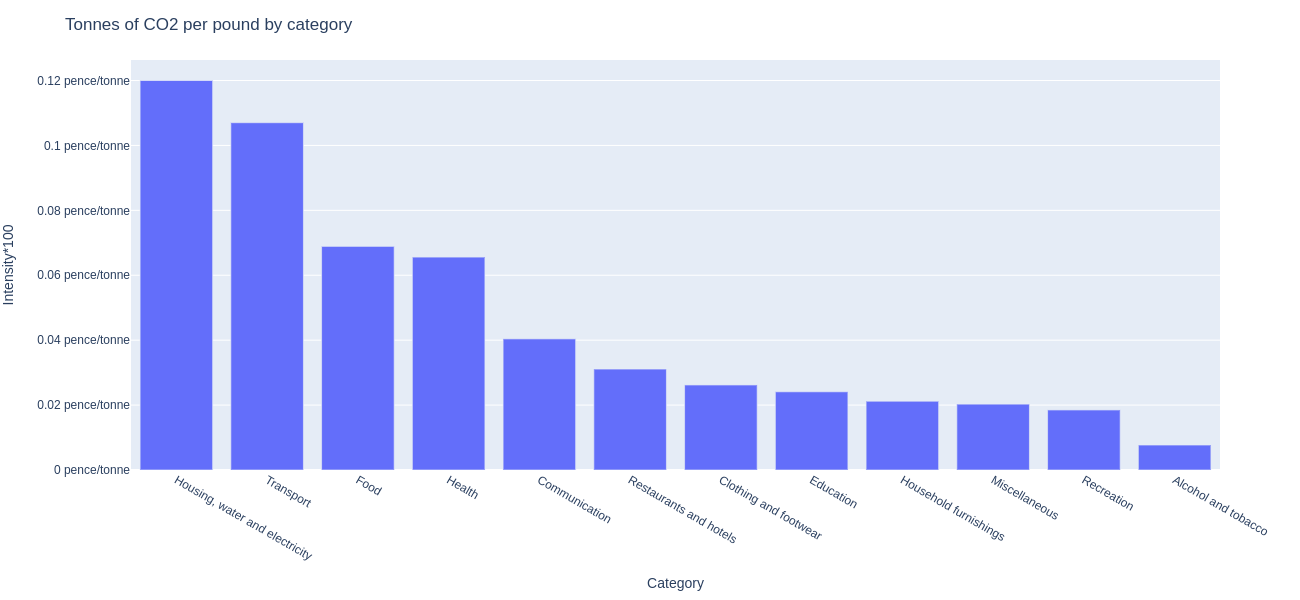

In [11]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "Category": [
        "Alcohol and tobacco",
        "Clothing and footwear",
        "Communication",
        "Education",
        "Food",
        "Health",
        "Household furnishings",
        "Housing, water and electricity",
        "Miscellaneous",
        "Recreation",
        "Restaurants and hotels",
        "Transport",
    ],
    "Intensity": [
        7.7e-05,
        0.000262,
        0.000404,
        0.000241,
        0.000689,
        0.000656,
        0.000212,
        0.0012,
        0.000203,
        0.000185,
        0.000311,
        0.00107,
    ]
})

df["Intensity*100"] = df.Intensity * 100

px.bar(df.sort_values("Intensity", ascending=False), x="Category", y="Intensity*100").update_layout(
    title="Tonnes of CO2 per pound by category",
    yaxis_ticksuffix=" pence/tonne",
    width=800,
    height=600,
)